In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
plt.style.use("fivethirtyeight")

Loading the data

In [2]:
import json
import pandas as pd

with open("tweets-dataset.json", 'r') as f:
    raw_data = json.load(f)

# Converting to dataframe for easy handling of data
df = pd.json_normalize(raw_data, max_level=1)

**What can we say about the users who tweeted this hashtag?**

Let's begin by checking all the information about a user that is available to us

In [3]:
print(*raw_data[0]['user'].keys(), sep="\n")

id
id_str
name
screen_name
location
description
url
entities
protected
followers_count
friends_count
listed_count
created_at
favourites_count
utc_offset
time_zone
geo_enabled
verified
statuses_count
lang
contributors_enabled
is_translator
is_translation_enabled
profile_background_color
profile_background_image_url
profile_background_image_url_https
profile_background_tile
profile_image_url
profile_image_url_https
profile_banner_url
profile_link_color
profile_sidebar_border_color
profile_sidebar_fill_color
profile_text_color
profile_use_background_image
has_extended_profile
default_profile
default_profile_image
following
follow_request_sent
notifications
translator_type


We will first see when were these accounts created

In [4]:
import datetime

# Utility function to get year from the timestamp string
get_year = lambda x: datetime.datetime.strptime(x, "%a %b %d %H:%M:%S %z %Y").year

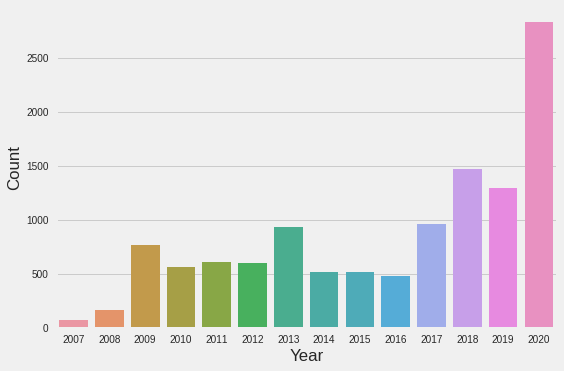

In [5]:
user_years = [*map(get_year, df['user.created_at'])]
ax = sns.countplot(
    x=user_years
);
ax.set(xlabel="Year", ylabel="Count");

It seems that a good chunk of accounts that were tweeting about #Bitcoin were created in this year

In [6]:
# Percentage of accounts that were made this year
print("Total Accounts:", len(user_years))
print("2020  Accounts:", user_years.count(2020))
print("Percentage    : {:.2f}%".format(user_years.count(2020)/len(user_years) * 100))

Total Accounts: 11772
2020  Accounts: 2827
Percentage    : 24.01%


Almost a quater of accountes were created just this year

Lets now see the distribution of months for our 2020 accounts

In [7]:
# Get a list of months
months = []
for i in range(1, 13):
    time = datetime.date(2020, i, 1)
    months.append(time.strftime("%B"))

# Utility function to get month
get_month = lambda x: datetime.datetime.strptime(x, "%a %b %d %H:%M:%S %z %Y").month

In [8]:
# Filtering out accounts not created in 2020
new_users = [*filter(lambda x: get_year(x) == 2020, df["user.created_at"])]

new_user_months = [*map(get_month, new_users)]

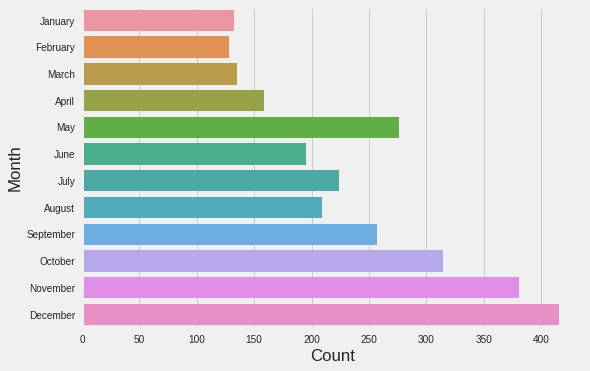

In [9]:
# Changed chart orientation for better readabilty of labels
ax = sns.countplot(
    y=new_user_months,
);
ax.set(xlabel="Count", ylabel="Month")
ax.set(yticklabels=months);

It seems that out of all the months in 2020, December saw the highest account creation

In [10]:
print("2020 Accounts                  :", len(new_user_months))
print("Accounts made in last 4 months :", len([*filter(lambda x: x>=9, new_user_months)]))
print("Percentage                     : {:.2f}%".format(len([*filter(lambda x: x>=9, new_user_months)])/len(new_user_months) * 100))

2020 Accounts                  : 2827
Accounts made in last 4 months : 1369
Percentage                     : 48.43%


Almost half of the accounts created in 2020 were created in just the last four months

Now lets examine the number of tweets each user has favourited (liked)

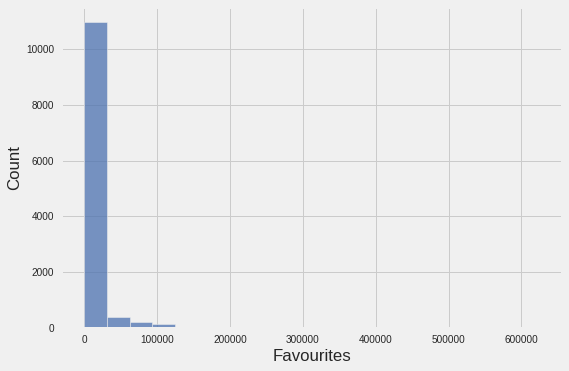

In [11]:
ax = sns.histplot(
    x=df["user.favourites_count"],
    bins=20
);
ax.set(xlabel="Favourites");

Not very helpful, it just tells us that most of these people has liked less than 50000 tweets. Let's take into consideration, less than 10000 likes

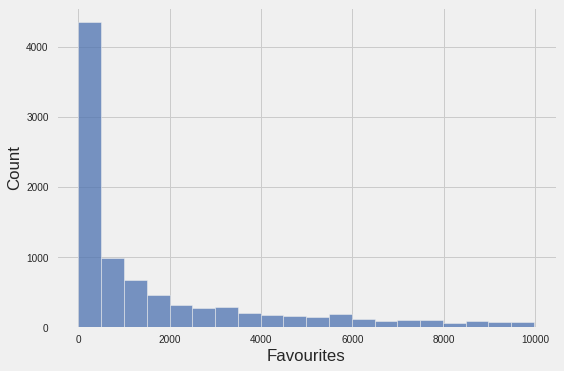

In [12]:
ax = sns.histplot(
    x=df[df["user.favourites_count"] <= 10000]["user.favourites_count"],
    bins=20
);
ax.set(xlabel="Favourites");

That's better. The likes from users seem to be close to a half normal distrbution.

Same approach can be used for the status counts from the user. Twitter count each tweet and retweet as part of counting their statuses

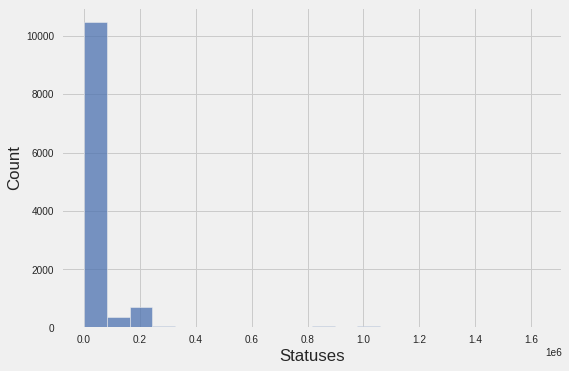

In [13]:
ax = sns.histplot(
    x=df["user.statuses_count"],
    bins=20
);
ax.set(xlabel="Statuses");

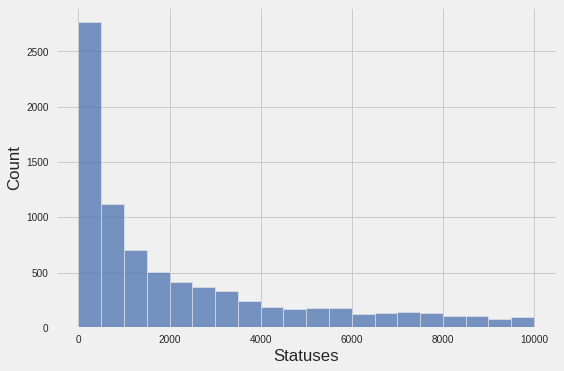

In [14]:
ax = sns.histplot(
    x=df[df["user.statuses_count"] <= 10000]["user.statuses_count"],
    bins=20
);
ax.set(xlabel="Statuses");

It seems to be the case that most users don't use their accounts a lot after creating them

**Can we draw any insights about their user’s followers and friends?**

The only relevant information available in the dataset are the follower and friends count.

Let's draw a scatter plot using these two attributes with consideration for the limts on the axes

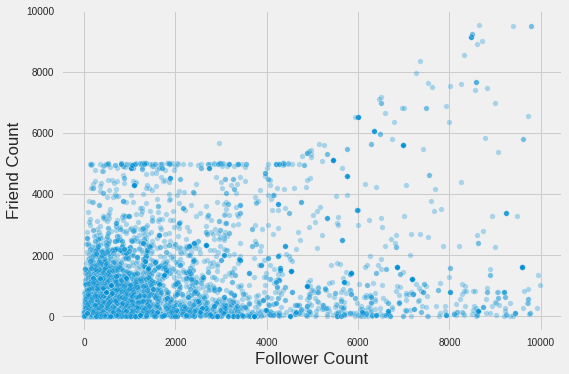

In [15]:
ax = sns.scatterplot(
    x="user.followers_count",
    y="user.friends_count",
    data=df[
        (df["user.followers_count"] <= 10000) &
        (df["user.friends_count"] <= 10000)
    ],
    alpha=0.3,
    s=30
);
ax.set(xlabel="Follower Count", ylabel="Friend Count");

It is clear that most of the users are concentrated around the lower end for followers and friends count

An interesting phenomenon to observe is that there is a sharp line at 5000 at the friends count axis for relatively smaller accounts  
Upon further digging it turns out that twitter imposes a limit of 5000 for following people. This limit is pushed up when an account gains followers  
More info [here](https://help.twitter.com/en/using-twitter/twitter-follow-limit)

**Can we comment on the language aspect of the corpus collected?**

A chart showing the top 10 languages in the collected data

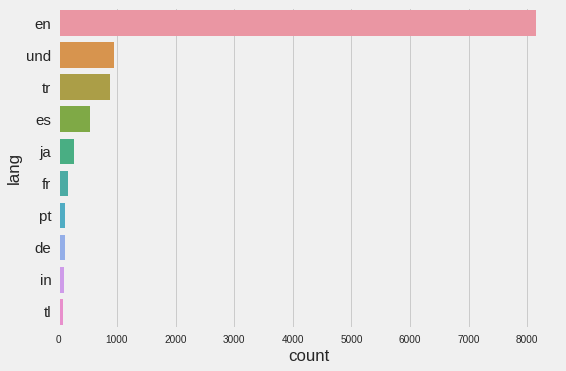

In [16]:
ax = sns.countplot(
    y="lang",
    data=df,
    order=df["lang"].value_counts().iloc[:10].index
)
ax.yaxis.set_tick_params(labelsize=15)

As is common for any global social media website, most tweets are in English (en)  
The second place is occupied by the "undefined" tag i.e. the language could not be detected  
They are followed by Turkish, Spanish, Japanese, etc.